# K-MEANS CLUSTERING
### Developed by Bernardo Puente 

Last update: 01/01/2020

## Context
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.
Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.

The objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.

A cluster refers to a collection of data points aggregated together because of certain similarities.
You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.

Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.
In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

<img src="clustering.png" alt="drawing" width="500">

Find more info on K-means algorithm at: https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

## Input
This code takes as an input a file containing (lat,long) coordinates which will be the data for the algorithm analysis, and the number of K clusters defined by the user.

## Output
This code will output a similar file as the input file, with the original (lat,long) coordinates, plus an aditional row containing the cluster to which each point belongs.


# Code Start:

### Import libraries

In [1]:
import numpy as np #We will use numpy to handle data
import matplotlib.pyplot as plt #We will use matplotlib to plot data results
import seaborn as sns; sns.set() #Also to plot results
import pandas as pd #We will use pandas to read, handle, and write data into files
from scipy.cluster.vq import kmeans2, whiten #We will use scipy as the k-means library. We use scipy over sklearn since results showed to be more stable.

### Read input file

The following segment will read the input file, and will assign the corresponding [lat,long] points to a list to work with such values

In [2]:
Data = pd.read_excel("Input K-Means.xlsx") #In this case this file contains only one sheet with 2 unique columns: lat, long.
coordinates=Data.values #This transforms the data of the data frame into a list.
coordinates

array([[ -0.3023479 , -78.4556168 ],
       [ -0.21621769, -78.40304551],
       [ -0.2549564 , -78.5371898 ],
       ...,
       [ -0.196863  , -78.435747  ],
       [ -0.196863  , -78.435747  ],
       [ -0.30297553, -78.45040795]])

### Run the K-means algorithm

The following segment will run the k-Means algorithm according to the kmeans2 sklearn library. It takes the defined coordinates as an input, but *also* the number of K number of clusters defined by the user. The user should try to verify results with k=1,2,3,...,n until results make sense according to the researcher knowledge of the data. To better address results, a histogram of the number of members per cluster is displayed after the algorithm run.

In [3]:
k=4 #Define the number of clusters to be computed.
iterations= 50 #Define the number of iterations the algorithm will complete until it stops

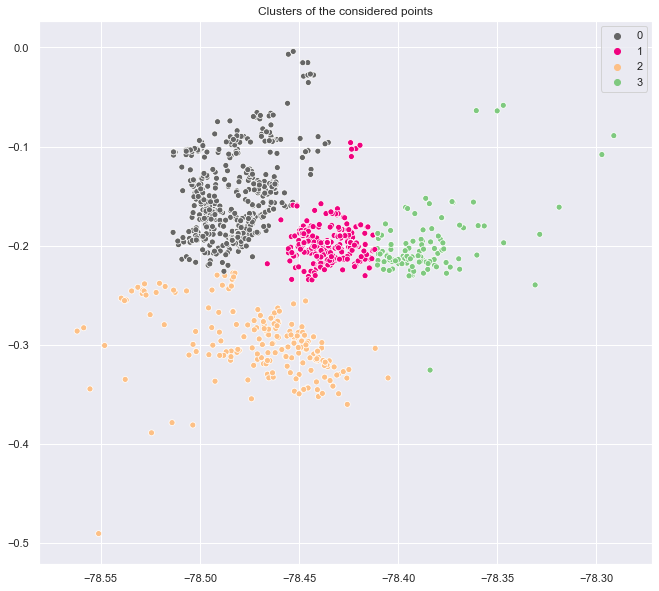

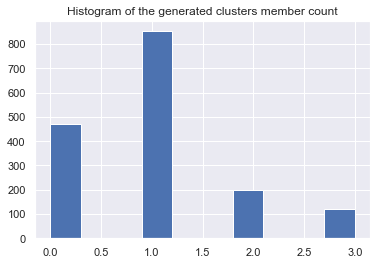

In [4]:
points, clusters = kmeans2(whiten(coordinates), k, iter = iterations) #Call the kmeans method which will output the points under study, and the cluster to which each point corresponds.

#This segment graphs the clusters with colors. Map of Quito shows in its geographic location
x=coordinates[:,0]
y=coordinates[:,1]
plt.figure(figsize=(11, 10))
g=sns.scatterplot(y,x,legend='full',hue=clusters,palette="Accent_r")
plt.title("Clusters of the considered points") 
plt.show(g)

#Graphs the histogram of clusters members count. This is useful to know the importance of each cluster according to the number of members it has.
h=plt.hist(clusters)
plt.title("Histogram of the generated clusters member count") 
plt.show(h)

In [5]:
#Include the generated clusters into the original datafrme and export the output file
Data['Cluster']=clusters
filepath = 'K-means output.xlsx'
Data.to_excel(filepath, index=False)

### End of code.